<a href="https://colab.research.google.com/github/hmzashh/programming-tests/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/HeartDiseaseTrain.csv')
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [10]:
df.describe()

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512,0.513171
std,9.072290,17.516718,51.59251,23.005724,1.175053,0.500070
min,29.000000,94.000000,126.00000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000,1.000000
75%,61.000000,140.000000,275.00000,166.000000,1.800000,1.000000
max,77.000000,200.000000,564.00000,202.000000,6.200000,1.000000


In [31]:
dfcat=df.select_dtypes(include='object')
dfcat

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
0,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,Two,Reversable Defect
1,Male,Typical angina,Greater than 120 mg/ml,Normal,Yes,Upsloping,Zero,Reversable Defect
2,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,Yes,Upsloping,Zero,Reversable Defect
3,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,One,Reversable Defect
4,Female,Typical angina,Greater than 120 mg/ml,ST-T wave abnormality,No,Flat,Three,Fixed Defect
...,...,...,...,...,...,...,...,...
1020,Male,Atypical angina,Lower than 120 mg/ml,ST-T wave abnormality,Yes,Downsloping,Zero,Fixed Defect
1021,Male,Typical angina,Lower than 120 mg/ml,Normal,Yes,Flat,One,Reversable Defect
1022,Male,Typical angina,Lower than 120 mg/ml,Normal,Yes,Flat,One,Fixed Defect
1023,Female,Typical angina,Lower than 120 mg/ml,Normal,No,Downsloping,Zero,Fixed Defect


In [32]:
dfcat.describe()

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
count,1025,1025,1025,1025,1025,1025,1025,1025
unique,2,4,2,3,2,3,5,4
top,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Flat,Zero,Fixed Defect
freq,713,497,872,513,680,482,578,544


In [15]:

#df['vessels_colored_by_flourosopy'].unique()
df['thalassemia'].unique()

array(['Reversable Defect', 'Fixed Defect', 'Normal', 'No'], dtype=object)

In [16]:
dfNum['sex'].value_counts()#malemore than female

,count
sex,
Male,713
Female,312


# **Univaiate analysis**

In [33]:
dfcat.head(1)

,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia
0,Male,Typical angina,Lower than 120 mg/ml,ST-T wave abnormality,No,Downsloping,Two,Reversable Defect


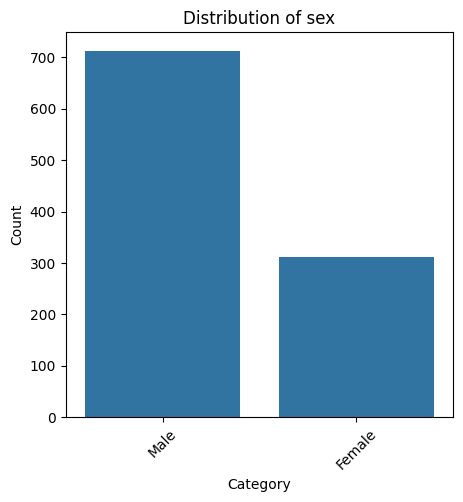

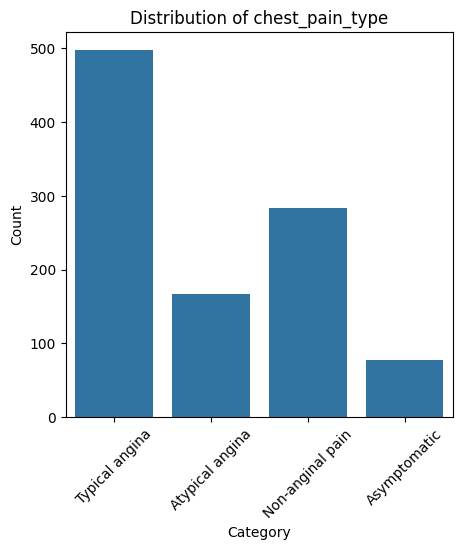

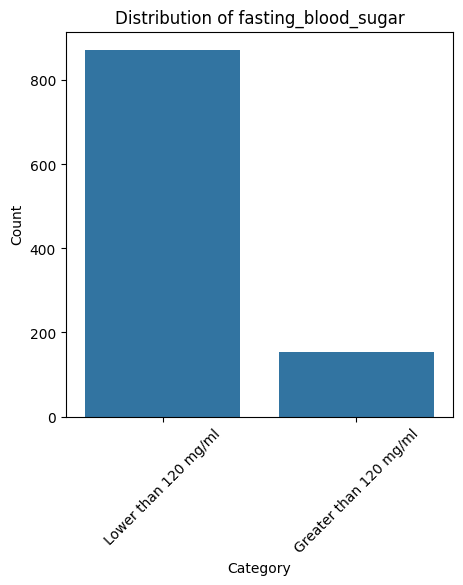

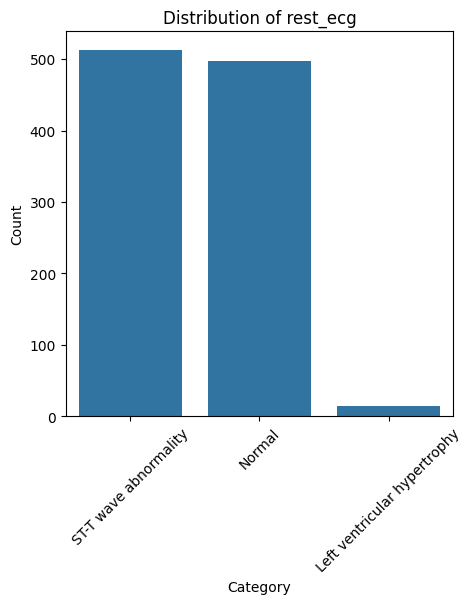

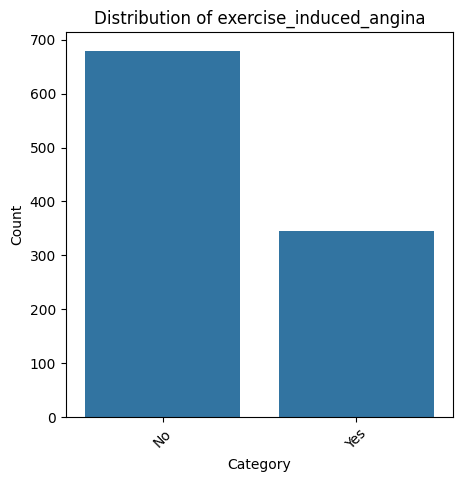

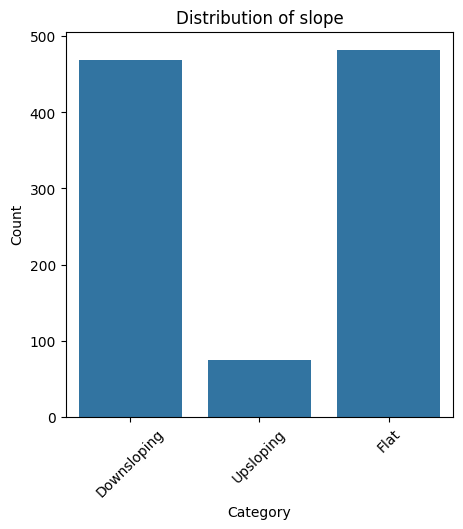

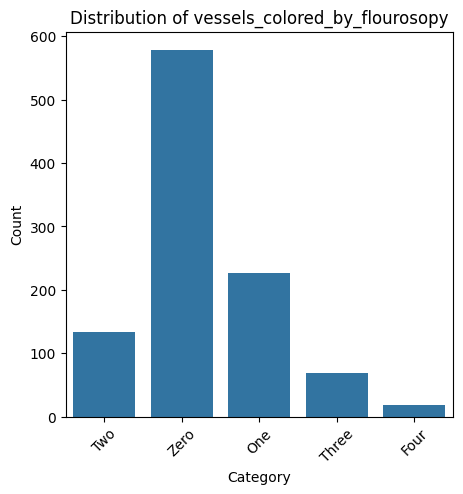

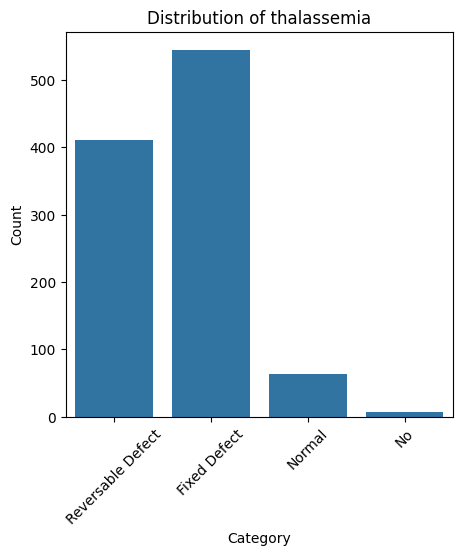

In [40]:
categ = dfcat.columns

for col in categ:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=df[col])
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [34]:
dfnum=df.select_dtypes(exclude='object')
dfnum

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
0,52,125,212,168,1.0,0
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,0
4,62,138,294,106,1.9,0
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,1
1021,60,125,258,141,2.8,0
1022,47,110,275,118,1.0,0
1023,50,110,254,159,0.0,1


In [35]:
dfnum.head(1)

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,target
0,52,125,212,168,1.0,0


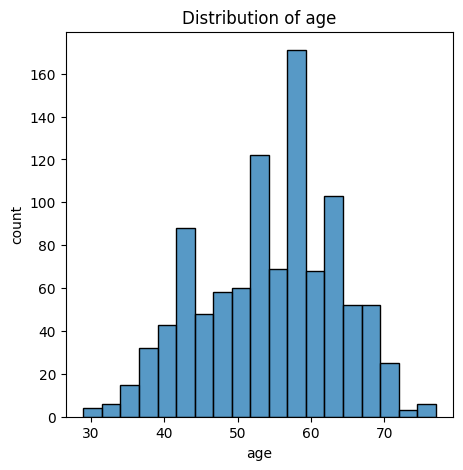

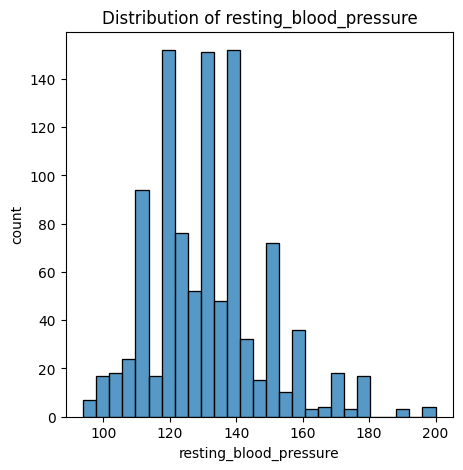

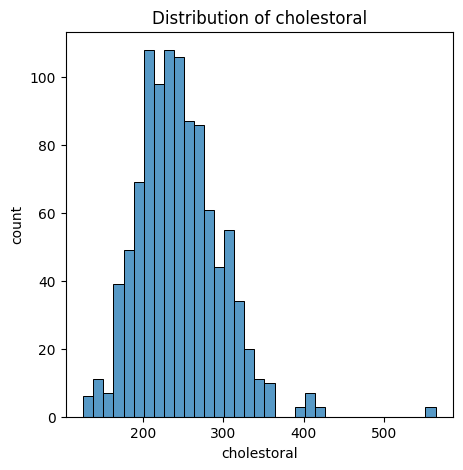

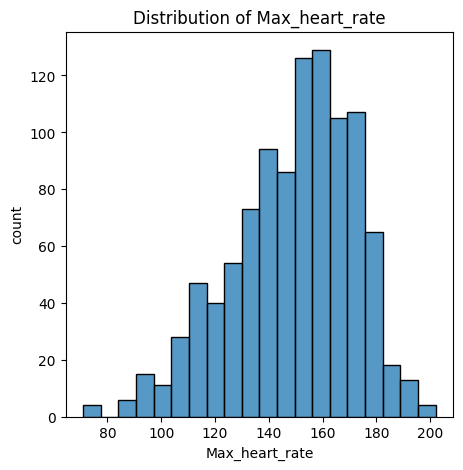

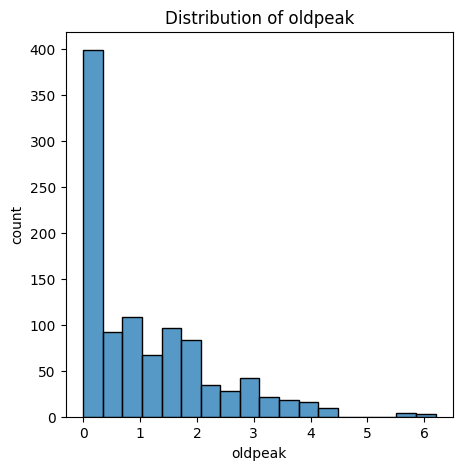

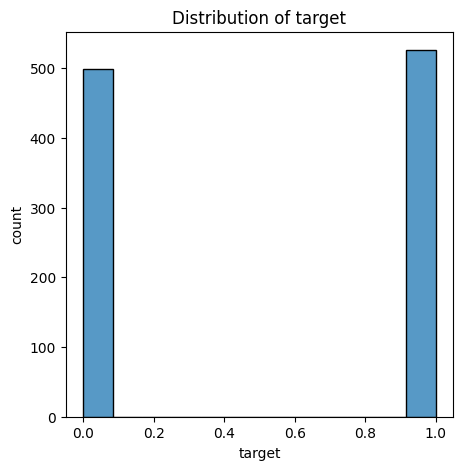

In [41]:
nume=dfnum.columns
for num in nume:
  plt.figure(figsize=(5,5))
  sns.histplot(x=df[num])
  plt.xlabel(f'{num}')
  plt.ylabel('count')
  plt.title(f'Distribution of {num}')
  plt.show()

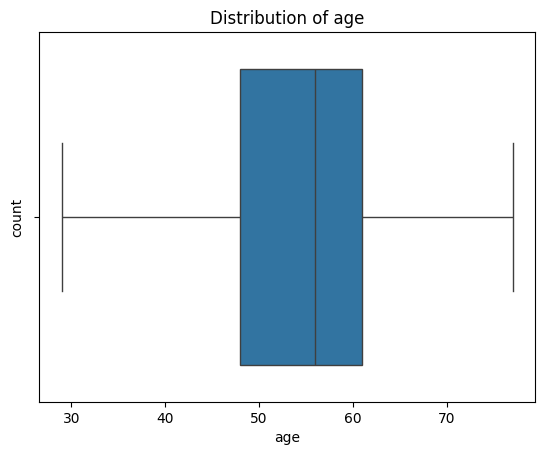

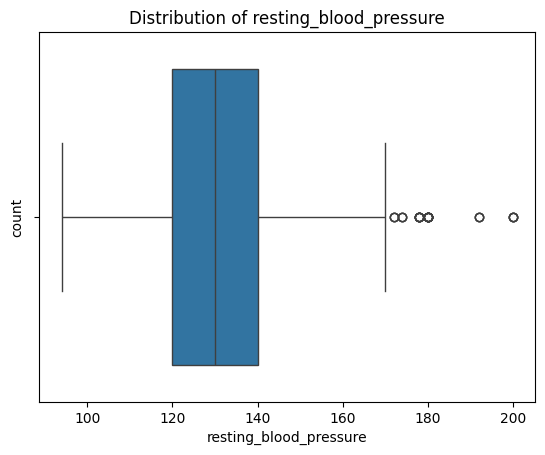

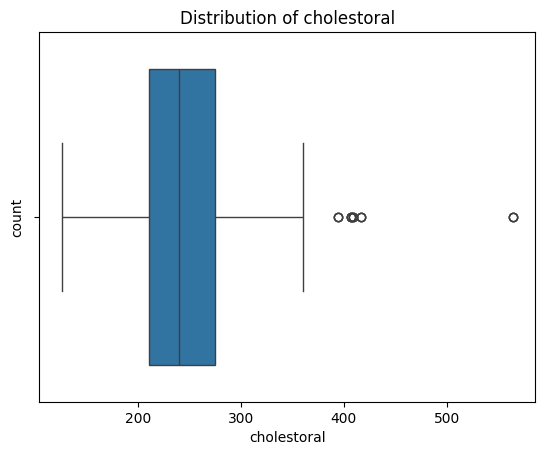

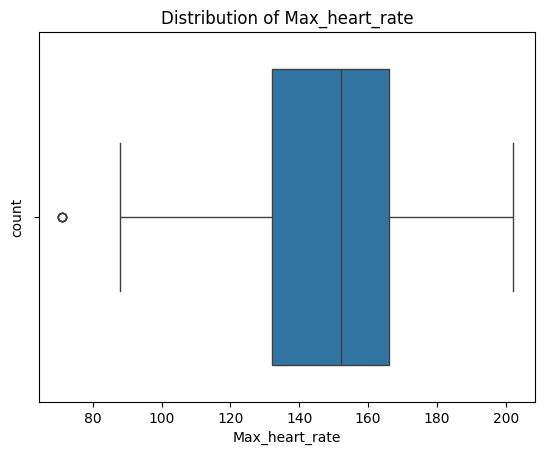

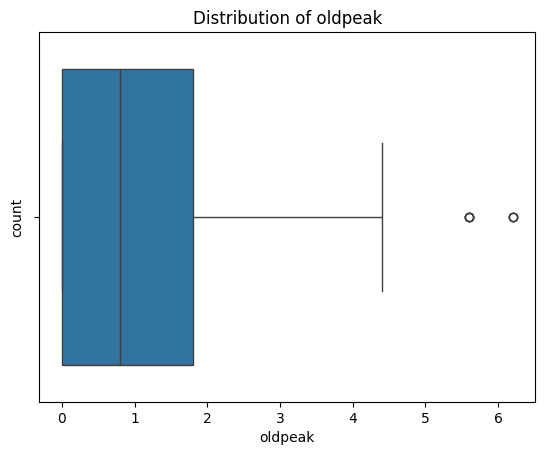

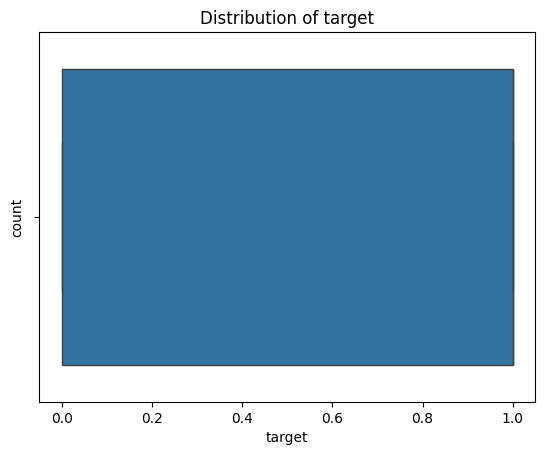

In [42]:
for num in nume:
  sns.boxplot(x=df[num])
  plt.xlabel(f'{num}')
  plt.ylabel('count')
  plt.title(f'Distribution of {num}')
  plt.show()

# **Bivariate analysis**

The incidence of heart disease is higher among women than among men.

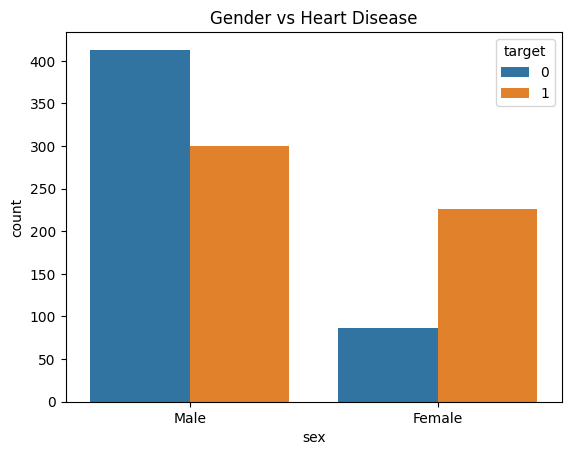

In [44]:
sns.countplot(df,x='sex',hue='target')

plt.title('Gender vs Heart Disease')

plt.show()

Cholesterol level is not a decisive indicator alone.

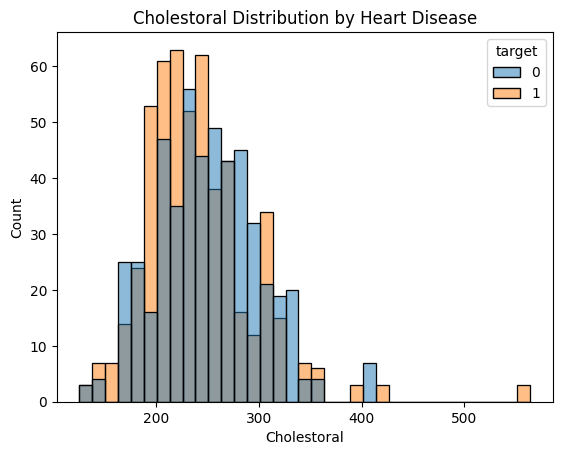

In [49]:
sns.histplot(data=df, x='cholestoral', hue='target')
plt.title('Cholestoral Distribution by Heart Disease')
plt.xlabel('Cholestoral')
plt.ylabel('Count')
plt.show()


Cholesterol level alone or age alone may not be enough to determine heart disease.

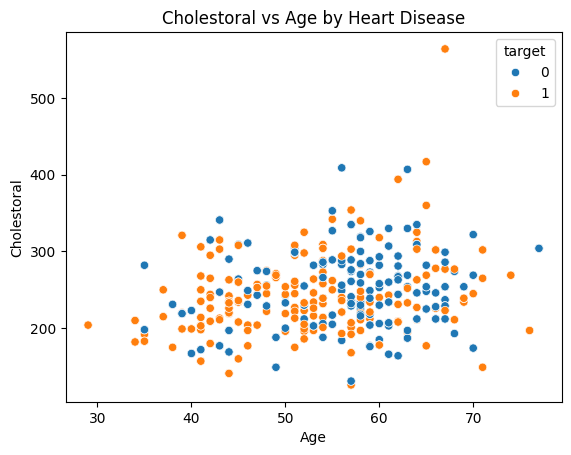

In [57]:
sns.scatterplot(df, x='age', y='cholestoral', hue='target')
plt.title('Cholestoral vs Age by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Cholestoral')
plt.show()

Categories with atypical or non-cardiac pain are associated with a higher degree of heart disease.

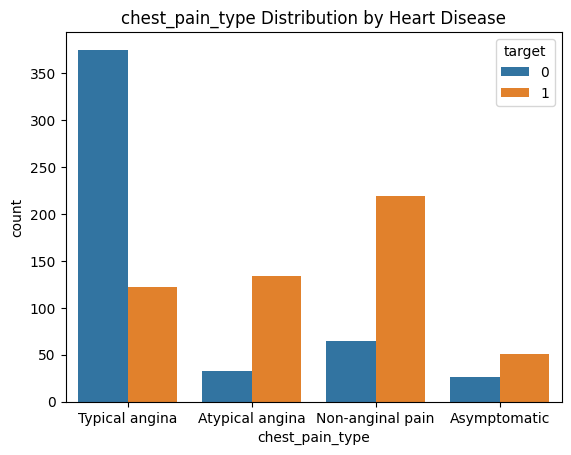

In [62]:
sns.countplot(data=df, x='chest_pain_type', hue='target')
plt.title('chest_pain_type Distribution by Heart Disease')

plt.show()